# Derivación numérica: diferencias finitas

En este notebook, implementarán funciones que calculan la derivada numéricamente, de una función $f(x)$ en un punto $x_0$ dado.

## Derivada *derecha*

Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ en una variable (a priori arbitaria) que se debe introducir como argumento, en un punto $x_0$ arbitrario, pero que por default lo hace en  $x_0=0.0$. 

Para esto, utilicen la definición de la derivada:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0)}{h},
\end{equation}

que requiere la especificación de `h`. (Este método se conoce por el nombre de *diferencias finitas*.)

A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico (respecto al valor *exacto*, que deberán conocer analíticamente). (Para ser concretos, obtengan la derivada de la función de prueba $f(x) = 3x^3-2$, en $x_0=1$.) Dibujen, como función de $h$, el error de su cálculo (usar escala logarítmica en ambos ejes puede ser una buena idea). A partir de eso, ¿qué conclusión podemos sacar sobre *la convergencia* del cálculo numérico de la derivada? 


In [1]:
using PyPlot

In [101]:
function derivada(f,x₀,h) 
    
    (f(x₀ + h) - f(x₀))/h
    
end

derivada (generic function with 1 method)

In [125]:
function grafica_error(n, x₀, metodo, f, derivada_exacta)
    
    """
    Esta función genera dos arreglos hs y errs de datos, que contienen, respectivamente, los valores del incremento h y 
    su respectivo error entre el método de derivación numérica ingresado y la derivada exacta de una función f(x).
    
    Los argumentos son: n, el número de incrementos, h, a generar (h desde 1 hasta 10^-n); x₀, el punto donde se evalua la
    derivada; metodo, el método de derivación numérica a emplear; f, la función a derivar; derivada_exacta, la
    expresión de la derivada exacta de f.
    
    """
   
    hs = zeros(0.0:n)
    errs = zeros(0.0:n)
    
    for i in 0:n
        
        h = 10.0^(-i)

        derivada_aprox = metodo(f, x₀, h)
        
        err = abs(derivada_exacta(x₀) - derivada_aprox)
        
        hs[i+1] = h
        errs[i+1] = err
        
     end
    return hs, errs
end      

grafica_error (generic function with 1 method)

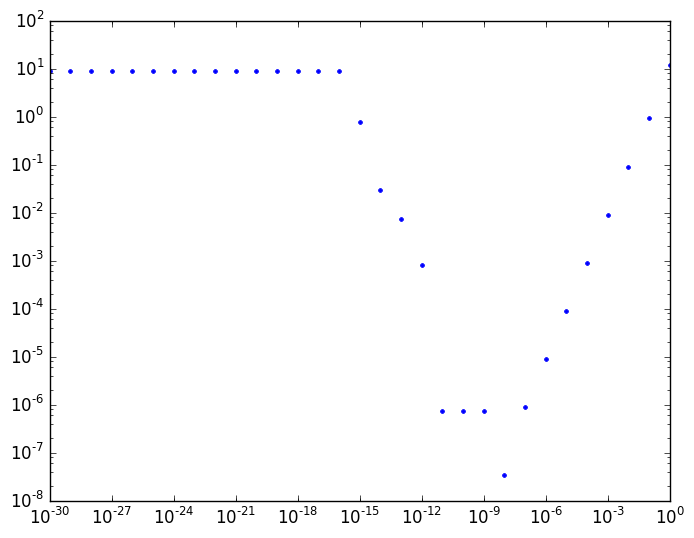

In [119]:
x₀ = 1
n = 30

hs, errs = grafica_error(n, x₀, (x,y,z) -> derivada(x,y,z), x -> 3*x^3-2, x -> 9*x^2)
loglog(hs,errs,".");

## Derivada simétrica

Repitan el ejercicio anterior usando cómo definición de la derivada la versión *simétrica* de la definición de la derivada, es decir:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
\end{equation}



In [15]:
function derivada_sim(f,x₀,h) 

    derivada_aprox = (f(x₀+h) - f(x₀-h))/(2*h)
    derivada_aprox
    
end

derivada_sim (generic function with 1 method)

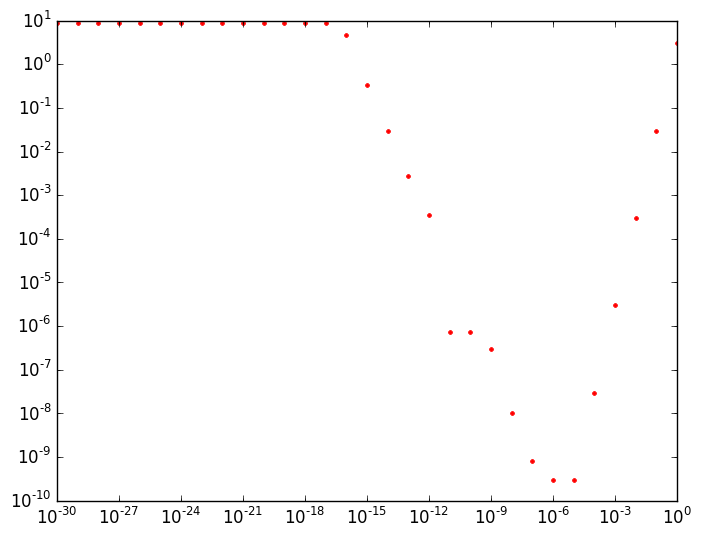

In [73]:
hs_sim, errs_sim = grafica_error(n,x₀, (x,y,z) -> derivada_sim(x,y,z), x -> 3*x^3-2, x -> 9*x^2)
loglog(hs_sim,errs_sim,"r.");

## Derivada *compleja*

Repitan el ejercicio anterior considerando ahora que el incremento de la variable independiente es infinitesimal e *imaginario*. Así, tenemos la definición:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \Im\Big(\frac{f(x_0+ i h)}{h}\Big).
\end{equation}


In [17]:
function derivada_com(f,x₀,h)
    imag(f(x₀+h*im)/h)
end

derivada_com (generic function with 1 method)

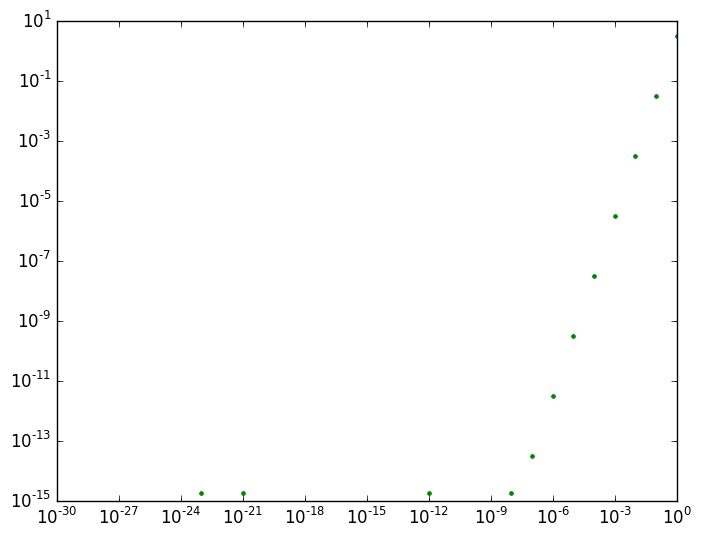

In [92]:
hs_com, errs_com = grafica_error(n,x₀, (x,y,z) -> derivada_com(x,y,z), x -> 3*x^3-2, x -> 9*x^2)
loglog(hs_com,errs_com,"g.");

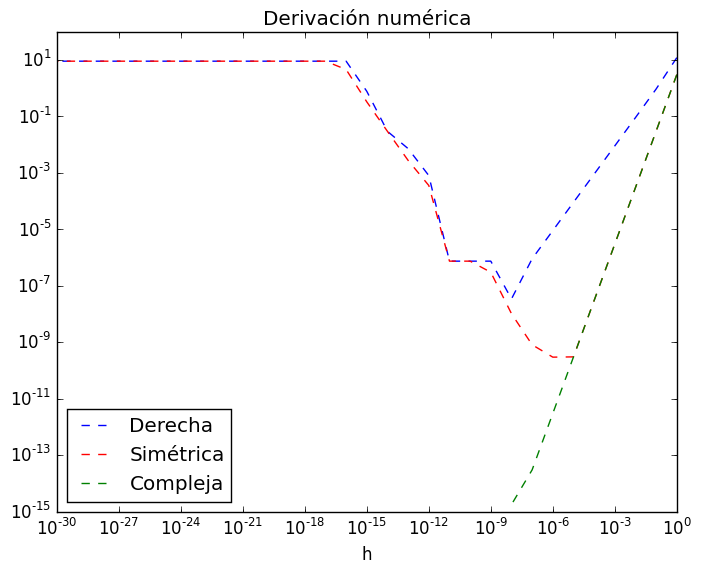

In [100]:
loglog(hs,errs,"--", label="Derecha")
loglog(hs_sim,errs_sim,"r--", label="Simétrica")
loglog(hs_com,errs_com,"g--", label="Compleja")
xlabel("h")
title("Derivación numérica")
legend(loc="lower left");

## Preguntas

- ¿Cuál de las definiciones anteriores es mejor en términos de dar el valor *más exacto* de la derivada? Den un argumento sólido de su conclusión en términos del tipo de convergencia hacia el valor exacto.

La última gráfica en la que se comparan los tres métodos se observa que la derivada compleja converge tan rápido como la simétrica (ambas más rápido que la derecha), sin embargo, la compleja llega a valores de error de incluso 0. Por lo que la derivada compleja a partir de incrementos, $h$, del orden de $10^{-9}$ da valores demasiado exactos.

In [99]:
errs_com

31-element Array{Float64,1}:
 3.0        
 0.03       
 0.0003     
 3.0e-6     
 3.0e-8     
 3.0e-10    
 3.00027e-12
 3.01981e-14
 1.77636e-15
 0.0        
 0.0        
 0.0        
 1.77636e-15
 ⋮          
 0.0        
 0.0        
 1.77636e-15
 0.0        
 1.77636e-15
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        

- ¿Qué comportamiento de las derivadas en términos de $h$ nos incomoda (en lo más profundo de las entrañas)? ¿A qué se debe esto?

Notamos nuevamente de la última gráfica que las derivadas derecha y simétrica a partir de cierto valor de h, alrededor de $10^{-8}$ y $10^{-5}$ respectivamente, el error ya no solo deja de decrecer, sino que empieza a aumentar, llegando hasta un error de 10 en el cual se queda para los demás valores de $h$ menores. Esto se debe a lo que se conoce como ***cancelación catastrófica***, que básicamente es la pérdida de datos significativos que se produce por la diferencia de dos números muy parecidos. Entonces, recordamos que hay una resta implicada en las definiciones de derivada derecha y derivada simétrica, y cuando $h$ es muy pequeña $f(x_0+h)$ es cada vez más parecida a $f(x_0)$. Mientras que en la derivada compleja esto no tiene efecto alguno, pues no incluye ninguna diferencia.